## Import

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import os
import numpy as np
import itertools
import pandas as pd
import math
from scipy.signal import get_window
import scipy
from sklearn import preprocessing
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 
import pickle
import IPython.display as ipd


## Features Extraction

In [3]:
def calculate_delta(array):
    rows,cols = array.shape
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
                first =0
            else:
                first = i-j
            if i+j > rows-1:
                second = rows-1
            else:
                second = i+j 
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    return deltas


def extract_features_for_data(file_path):
    audio , sample_rate = librosa.load(file_path, mono=True ,duration=2.8)
    # audio = audio[15000:25000]
    # print(np.shape(audio))
    # y,index=librosa.effects.trim(audio,top_db=55)
    # audio = y[index[0]:index[1]]
    mfcc_feature = mfcc.mfcc(audio,sample_rate, 0.025, 0.01,20, nfft = 1200 ,appendEnergy=True)
    mfcc_feature = preprocessing.scale(mfcc_feature)
    delta = calculate_delta(mfcc_feature)
    combined = np.hstack((mfcc_feature,delta)) 
    return combined

def extract_features_test(file_path):
    audio , sample_rate = librosa.load(file_path, mono=True, duration=2.8)
    # audio = audio[15000:25000]
    # audio = audio[:15000]
    # print(np.shape(audio))
    # y,index=librosa.effects.trim(audio,top_db=55)
    # audio = y[index[0]:index[1]]
    mfcc_feature = mfcc.mfcc(audio,sample_rate, 0.025, 0.01,20, nfft = 1200 ,appendEnergy=True)
    mfcc_feature = preprocessing.scale(mfcc_feature)
    delta = calculate_delta(mfcc_feature)
    combined = np.hstack((mfcc_feature,delta)) 
    return combined


# Old Project

In [294]:
# Trying extract feature " mfcc "

AhmedClose = []
directory = './files_2/12-12/close-ahmed/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedClose=np.vstack(extract_features_for_data(audio_path))

MustafaClose = []
directory = './files_2/12-12/close-mustafa/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaClose=np.vstack(extract_features_for_data(audio_path))

AshiaClose = []
directory = './files_2/12-12/close-ashia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AshiaClose=np.vstack(extract_features_for_data(audio_path))

YehiaClose = []
directory = './files_2/12-12/close-yahia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    YehiaClose=np.vstack(extract_features_for_data(audio_path))


(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(59271,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)


In [295]:
#Close_The_Doors_Models (Perfecto)

AhmedClose_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedClose_gmm.fit(AhmedClose)

MustafaClose_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaClose_gmm.fit(MustafaClose)

AshiaClose_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AshiaClose_gmm.fit(AshiaClose)

YehiaClose_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
YehiaClose_gmm.fit(YehiaClose)

GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

In [250]:
# pickle.dump(Open_gmm,open('open.gmm','wb'))


In [251]:
# pickle.dump(Aisha_gmm,open('Aisha.gmm','wb'))
# pickle.dump(mostafa_gmm,open('mostafa.gmm','wb'))
# pickle.dump(yahia_gmm,open('yahia.gmm','wb'))
# pickle.dump(ahmed_gmm,open('Ahmed.gmm','wb'))

In [286]:
test  = extract_features_test('./files_2/12-12/close-ahmed/ahmed (6).wav')
test2 = extract_features_test('./files_2/12-12/close-mustafa/mostafa-close (10).wav')
test3 = extract_features_test('./files_2/12-12/close-ashia/aisha-close (10).wav')
test4 = extract_features_test('./files_2/12-12/close-yahia/yehia-close (10).wav')

scores_1 = np.array(AhmedClose_gmm.score(test))
scores_2 = np.array(MustafaClose_gmm.score(test))
scores_3 = np.array(AshiaClose_gmm.score(test))
scores_4 = np.array(YehiaClose_gmm.score(test))

print(scores_1)
print(scores_2)
print(scores_3)
print(scores_4)


C:\Users\ahmad\AppData\Roaming\Python\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: './files_2/12-12/close-mustafa/mostafa-close (10).wav'

In [253]:
# Trying extract feature " mfcc "
#Window
AhmedWindow = []
directory = './files_2/12-12/window-ahmed/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedWindow=np.vstack(extract_features_for_data(audio_path))

MustafaWindow = []
directory = './files_2/12-12/window-mustafa/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaWindow=np.vstack(extract_features_for_data(audio_path))

AshiaWindow = []
directory = './files_2/12-12/window-ashia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AshiaWindow=np.vstack(extract_features_for_data(audio_path))

YehiaWindow = []
directory = './files_2/12-12/window-yahia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    YehiaWindow=np.vstack(extract_features_for_data(audio_path))


(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)


In [254]:
AhmedWindow_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedWindow_gmm.fit(AhmedWindow)

MustafaWindow_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaWindow_gmm.fit(MustafaWindow)

AshiaWindow_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AshiaWindow_gmm.fit(AshiaWindow)

YehiaWindow_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
YehiaWindow_gmm.fit(YehiaWindow)

GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

In [255]:
# test  = extract_features_test('./files_2/12-12/window-ahmed/ahmed (15).wav.')
# test2 = extract_features_test('./files_2/12-12/window-mustafa/mostafa-window (20).wav')
# test3 = extract_features_test('./files_2/12-12/window-ashia/aisha-window (7).wav')
# test4 = extract_features_test('./files_2/12-12/window-yahia/yehia-window (7).wav')
# test5 = extract_features_test('./recordedAudio.wav')

# x=test
# scores_1 = np.array(AhmedWindow_gmm.score(x))
# scores_2 = np.array(MustafaWindow_gmm.score(x))
# scores_3 = np.array(AshiaWindow_gmm.score(x))
# scores_4 = np.array(YehiaWindow_gmm.score(x))

# print(scores_1)
# print(scores_2)
# print(scores_3)
# print(scores_4)

In [256]:
# Trying extract feature " mfcc "
#Door
AhmedDoor = []
directory = './files_2/12-12/door-ahmed/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedDoor=np.vstack(extract_features_for_data(audio_path))

MustafaDoor = []
directory = './files_2/12-12/door-mustafa/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaDoor=np.vstack(extract_features_for_data(audio_path))

AshiaDoor = []
directory = './files_2/12-12/door-ashia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AshiaDoor=np.vstack(extract_features_for_data(audio_path))

YehiaDoor = []
directory = './files_2/12-12/door-yahia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    YehiaDoor=np.vstack(extract_features_for_data(audio_path))


(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(

In [257]:
AhmedDoor_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedDoor_gmm.fit(AhmedDoor)

MustafaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaDoor_gmm.fit(MustafaDoor)

AshiaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AshiaDoor_gmm.fit(AshiaDoor)

YehiaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
YehiaDoor_gmm.fit(YehiaDoor)


GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

In [258]:
# test  = extract_features_test('./files_2/12-12/door-ahmed/ahmed (3).wav')
# test2 = extract_features_test('./files_2/12-12/dooor-mustafa/mostafa (9).wav')
# test3 = extract_features_test('./files_2/12-12/dooor-ashia/ashia-door (11).wav')
# test4 = extract_features_test('./files_2/12-12/dooor-yahia/yahia-dooor (11).wav')
# test5 = extract_features_test('E:\\universty\\3rd year\\final\\V_R\\Voice_Recognition\\static\\assets\\recordedAudio.wav')


# x=test5
# scores_1 = np.array(AhmedDoor_gmm.score(x))
# scores_2 = np.array(MustafaDoor_gmm.score(x))
# scores_3 = np.array(AshiaDoor_gmm.score(x))
# scores_4 = np.array(YehiaDoor_gmm.score(x))

# print(scores_1)
# print(scores_2)
# print(scores_3)
# print(scores_4)

In [259]:
# Trying extract feature " mfcc "
#push
AhmedPush = []
directory = './files_2/12-12/push-ahmed/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedPush=np.vstack(extract_features_for_data(audio_path))

MustafaPush = []
directory = './files_2/12-12/push-mustafa/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaPush=np.vstack(extract_features_for_data(audio_path))

AshiaPush = []
directory = './files_2/12-12/push-ashia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AshiaPush=np.vstack(extract_features_for_data(audio_path))

YehiaPush = []
directory = './files_2/12-12/push-yahia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    YehiaPush=np.vstack(extract_features_for_data(audio_path))


(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(34810,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)


In [260]:
AhmedPush_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedPush_gmm.fit(AhmedPush)

MustafaPush_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaPush_gmm.fit(MustafaPush)

AshiaPush_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AshiaPush_gmm.fit(AshiaPush)

YehiaPush_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
YehiaPush_gmm.fit(YehiaPush)

GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

In [261]:
# test  = extract_features_test('./files_2/12-12/push-ahmed/ahmed-push (11).wav')
# test2 = extract_features_test('./files_2/12-12/push-mustafa/mostafa-push (10).wav')
# test3 = extract_features_test('./files_2/12-12/push-ashia/aisha-push (13).wav')
# test4 = extract_features_test('./files_2/12-12/push-yahia/yehia-push (10).wav')
# test5 = extract_features_test('./recordedAudio.wav')


# scores_1 = np.array(AhmedPush_gmm.score(test))
# scores_2 = np.array(MustafaPush_gmm.score(test))
# scores_3 = np.array(AshiaPush_gmm.score(test))
# scores_4 = np.array(YehiaPush_gmm.score(test))

# print(scores_1)
# print(scores_2)
# print(scores_3)
# print(scores_4)


In [128]:
AhmedRecognition = []
directory = './files_2/12-12/V_R-ahmed/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedRecognition=np.vstack(extract_features_for_data(audio_path))

MustafaRecognition = []
directory = './files_2/12-12/V_R-mustafa/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaRecognition=np.vstack(extract_features_for_data(audio_path))

AshiaRecognition = []
directory = './files_2/12-12/V_R-ashia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AshiaRecognition=np.vstack(extract_features_for_data(audio_path))

YehiaRecognition = []
directory = './files_2/12-12/V_R-yahia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    YehiaRecognition=np.vstack(extract_features_for_data(audio_path))

AhmedRecognition_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedRecognition_gmm.fit(AhmedRecognition)

MustafaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaRecognition_gmm.fit(MustafaRecognition)

AshiaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AshiaRecognition_gmm.fit(AshiaRecognition)

YehiaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
YehiaRecognition_gmm.fit(YehiaRecognition)

(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(48922,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(

In [131]:
AhmedRecognition_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedRecognition_gmm.fit(AhmedRecognition)

MustafaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaRecognition_gmm.fit(MustafaRecognition)

AshiaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AshiaRecognition_gmm.fit(AshiaRecognition)

YehiaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
YehiaRecognition_gmm.fit(YehiaRecognition)

GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

In [264]:
# test  = extract_features_test('./files_2/12-12/V_R-ahmed/ahmed-open (2).wav')
# test2 = extract_features_test('./files_2/12-12/V_R-mustafa/mostafa-close (19).wav')
# test3 = extract_features_test('./files_2/12-12/V_R-ashia/aisha-close (2).wav')
# test4 = extract_features_test('./files_2/12-12/V_R-yahia/yehia-close (19).wav')
# test5 = extract_features_test('./recordedAudio.wav')


# scores_1 = np.array(AhmedRecognition_gmm.score(test2))
# scores_2 = np.array(MustafaRecognition_gmm.score(test2))
# scores_3 = np.array(AshiaRecognition_gmm.score(test2))
# scores_4 = np.array(YehiaRecognition_gmm.score(test2))


# print(scores_1)
# print(scores_2)
# print(scores_3)
# print(scores_4)


In [289]:
# DumpModels= ["AhmedClose_gmm","MustafaClose_gmm","AshiaClose_gmm","YehiaClose_gmm","AhmedDoor_gmm","MustafaDoor_gmm","AshiaDoor_gmm","YehiaDoor_gmm",
# "AhmedPush_gmm","MustafaPush_gmm","AshiaPush_gmm","YehiaPush_gmm","AhmedWindow_gmm","MustafaWindow_gmm","AshiaWindow_gmm","YehiaWindow_gmm",
# "AhmedRecognition_gmm","MustafaRecognition_gmm","AshiaRecognition_gmm","YehiaRecognition_gmm"]

# directory = './Models/'
# for Model in DumpModels:
#     Model_path = directory + Model    
#     pickle.dump(Model,open(f'./{Model.replace("_",".")}','wb'))


pickle.dump(AhmedClose_gmm,open('./Models/CloseAhmed.gmm','wb'))
pickle.dump(MustafaClose_gmm,open('./Models/CloseMustafa.gmm','wb'))
pickle.dump(AshiaClose_gmm,open('./Models/CloseAshia.gmm','wb'))
pickle.dump(YehiaClose_gmm,open('./Models/CloseYehia.gmm','wb'))

pickle.dump(AhmedDoor_gmm,open('./Models/DoorAhmed.gmm','wb'))
pickle.dump(MustafaDoor_gmm,open('./Models/DoorMustafa.gmm','wb'))
pickle.dump(AshiaDoor_gmm,open('./Models/DoorAshia.gmm','wb'))
pickle.dump(YehiaDoor_gmm,open('./Models/DoorYehia.gmm','wb'))

pickle.dump(AhmedPush_gmm,open('./Models/PushAhmed.gmm','wb'))
pickle.dump(MustafaPush_gmm,open('./Models/PushMustafa.gmm','wb'))
pickle.dump(AshiaPush_gmm,open('./Models/PushAshia.gmm','wb'))
pickle.dump(YehiaPush_gmm,open('./Models/PushYehia.gmm','wb'))

pickle.dump(AhmedWindow_gmm,open('./Models/WindowAhmed.gmm','wb'))
pickle.dump(MustafaWindow_gmm,open('./Models/WindowMustafa.gmm','wb'))
pickle.dump(AshiaWindow_gmm,open('./Models/WindowAshia.gmm','wb'))
pickle.dump(YehiaWindow_gmm,open('./Models/WindowYehia.gmm','wb'))

pickle.dump(AhmedRecognition_gmm,open('./Models/RecognitionAhmed.gmm','wb'))
pickle.dump(MustafaRecognition_gmm,open('./Models/RecognitionMustafa.gmm','wb'))
pickle.dump(AshiaRecognition_gmm,open('./Models/RecognitionAshia.gmm','wb'))
pickle.dump(YehiaRecognition_gmm,open('./Models/RecognitionYehia.gmm','wb'))


In [296]:
pickle.dump(AhmedClose_gmm,open('./Models/CloseAhmed.gmm','wb'))
pickle.dump(MustafaClose_gmm,open('./Models/CloseMustafa.gmm','wb'))
pickle.dump(AshiaClose_gmm,open('./Models/CloseAshia.gmm','wb'))
pickle.dump(YehiaClose_gmm,open('./Models/CloseYehia.gmm','wb'))

# 21 Models Project

## Ahmed Features

In [127]:
AhmedDoor = []
directory = './files_2/12-13/openthedoor/ahmed-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedDoor=np.vstack(extract_features_for_data(audio_path))

# Ahmedclose = []
# directory = './files_2/12-13/closethedoor/ahmed-close-uni/'
# for audio in os.listdir(directory):
#     audio_path = directory + audio
#     Ahmedclose=np.vstack(extract_features_for_data(audio_path))


# Ahmedgate = []
# directory = './files_2/12-13/openthegate/ahmed-gate-uni/'
# for audio in os.listdir(directory):
#     audio_path = directory + audio
#     Ahmedgate=np.vstack(extract_features_for_data(audio_path))

# AhmedWindow = []
# directory = './files_2/12-13/openthewindow/ahmed-window-uni/'
# for audio in os.listdir(directory):
#     audio_path = directory + audio
#     AhmedWindow=np.vstack(extract_features_for_data(audio_path))

AhmedDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedDoor_gmm.fit(AhmedDoor)

# Ahmedclose_gmm = GaussianMixture(n_components=6, max_iter = 200, covariance_type='diag',n_init =3)
# Ahmedclose_gmm.fit(Ahmedclose)

# Ahmedgate_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
# Ahmedgate_gmm.fit(Ahmedgate)

# AhmedWindow_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
# AhmedWindow_gmm.fit(AhmedWindow)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './files_2/12-13/openthedoor/ahmed-open-uni/'

### First Test

In [ ]:
open_the_door = []
close_the_door =[]
open_the_gate =[]
open_the_window =[]

directory = './files_2/12-13/openthedoor/ahmed-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    open_the_door.append(AhmedDoor_gmm.score(extract_features_for_data(audio_path)))
    close_the_door.append(Ahmedclose_gmm.score(extract_features_for_data(audio_path)))
    open_the_gate.append(Ahmedgate_gmm.score(extract_features_for_data(audio_path)))
    open_the_window.append(AhmedWindow_gmm.score(extract_features_for_data(audio_path)))

print(open_the_door)
print(close_the_door)
print(open_the_gate)
print(open_the_window)

### Second Test

In [254]:
test5 = extract_features_test('E:\\universty\\3rd year\\final\\V_R\\Voice_Recognition\\static\\assets\\recordedAudio.wav')

x=test5
scores_1 = np.array(Ahmedclose_gmm.score(x))
scores_2 = np.array(AhmedDoor_gmm.score(x))
scores_3 = np.array(Ahmedgate_gmm.score(x))
scores_4 = np.array(AhmedWindow_gmm.score(x))


print(scores_1)
print(scores_2)
print(scores_3)
print(scores_4)


-29.998621604150202
-30.246636509336863
-26.617507182689828
-25.578174201426442
-30.2218334763187
-29.673185260989445


### Save Models of Ahmed

In [ ]:
pickle.dump(AhmedDoor_gmm,open('./Models/ahmedDoor.gmm','wb'))
pickle.dump(Ahmedclose_gmm,open('./Models/ahmedclose.gmm','wb'))
pickle.dump(Ahmedgate_gmm,open('./Models/ahmedgate.gmm','wb'))
pickle.dump(AhmedWindow_gmm,open('./Models/ahmedWindow.gmm','wb'))

## Mustafa Features

In [68]:
MustafaDoor = []
directory = './files_2/12-13/openthedoor/mustafa-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaDoor=np.vstack(extract_features_for_data(audio_path))

Mustafaclose = []
directory = './files_2/12-13/closethedoor/ahmed-close-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    Mustafaclose=np.vstack(extract_features_for_data(audio_path))

Mustafagate = []
directory = './files_2/12-13/openthegate/mustafa-gate-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    Mustafagate=np.vstack(extract_features_for_data(audio_path))

MustafaWindow = []
directory = './files_2/12-13/openthewindow/mustafa-window-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaWindow=np.vstack(extract_features_for_data(audio_path))

MustafaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaDoor_gmm.fit(MustafaDoor)

Mustafaclose_gmm = GaussianMixture(n_components=6, max_iter = 200, covariance_type='diag',n_init =3)
Mustafaclose_gmm.fit(Mustafaclose)

Mustafagate_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
Mustafagate_gmm.fit(Mustafagate)

MustafaWindow_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaWindow_gmm.fit(MustafaWindow)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './files_2/12-13/closethedoor/ahmed-close-uni/'

### First Test

In [ ]:
open_the_door = []
close_the_door =[]
open_the_gate =[]
open_the_window =[]

directory = './files_2/12-13/openthewindow/Window-mustafa-home/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    open_the_door.append(MustafaDoor_gmm.score(extract_features_for_data(audio_path)))
    close_the_door.append(Mustafaclose_gmm.score(extract_features_for_data(audio_path)))
    open_the_gate.append(Mustafagate_gmm.score(extract_features_for_data(audio_path)))
    open_the_window.append(MustafaWindow_gmm.score(extract_features_for_data(audio_path)))

print(open_the_door)
print(close_the_door)
print(open_the_gate)
print(open_the_window)

### Second Test

In [21]:
test5 = extract_features_test('E:\\universty\\3rd year\\final\\V_R\\Voice_Recognition\\static\\assets\\recordedAudio.wav')


x=test5
scores_2 = np.array(MustafaDoor_gmm.score(x))
scores_1 = np.array(Mustafaclose_gmm.score(x))
scores_3 = np.array(Mustafagate_gmm.score(x))
scores_4 = np.array(MustafaWindow_gmm.score(x))


print(scores_1)
print(scores_2)
print(scores_3)
print(scores_4)


-29.665936687583034
-26.884805149829944
-31.556872164716754
-25.372316668512564


### Save Models of Mustafa

In [22]:
pickle.dump(MustafaDoor_gmm,open('./Models/MustafaDoor.gmm','wb'))
pickle.dump(Mustafaclose_gmm,open('./Models/Mustafaclose.gmm','wb'))
pickle.dump(Mustafagate_gmm,open('./Models/Mustafagate.gmm','wb'))
pickle.dump(MustafaWindow_gmm,open('./Models/MustafaWindow.gmm','wb'))

## Yahia Features

In [24]:

yahiaDoor = []
directory = './files_2/12-13/openthedoor/yahia-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    yahiaDoor=np.vstack(extract_features_for_data(audio_path))

yahiaclose = []
directory = './files_2/12-13/closethedoor/yahia-close-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    yahiaclose=np.vstack(extract_features_for_data(audio_path))

yahiagate = []
directory = './files_2/12-13/openthegate/yahia-gate-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    yahiagate=np.vstack(extract_features_for_data(audio_path))

yahiaWindow = []
directory = './files_2/12-13/openthewindow/yahia-window-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    yahiaWindow=np.vstack(extract_features_for_data(audio_path))


yahiaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
yahiaDoor_gmm.fit(yahiaDoor)

yahiaclose_gmm = GaussianMixture(n_components=6, max_iter = 200, covariance_type='diag',n_init =3)
yahiaclose_gmm.fit(yahiaclose)

yahiagate_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
yahiagate_gmm.fit(yahiagate)

yahiaWindow_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
yahiaWindow_gmm.fit(yahiaWindow)

(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)


GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

### First Test

In [ ]:
open_the_door = []
close_the_door =[]
open_the_gate =[]
open_the_window =[]

directory = './files_2/12-13/openthedoor/yahia-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    open_the_door.append(yahiaDoor_gmm.score(extract_features_for_data(audio_path)))
    close_the_door.append(yahiaclose_gmm.score(extract_features_for_data(audio_path)))
    open_the_gate.append(yahiagate_gmm.score(extract_features_for_data(audio_path)))
    open_the_window.append(yahiaWindow_gmm.score(extract_features_for_data(audio_path)))

print(open_the_door)
print(close_the_door)
print(open_the_gate)
print(open_the_window)

### Second Test

In [413]:
test5 = extract_features_test('E:\\universty\\3rd year\\final\\V_R\\Voice_Recognition\\static\\assets\\recordedAudio.wav')

print(yahiaDoor_gmm.score(test5))
print(yahiaclose_gmm.score(test5))
print(yahiagate_gmm.score(test5))
print(yahiaWindow_gmm.score(test5))

-24.76289115798022
-27.622459268630834
-28.136678803531723
-26.53003556590143


### Saving The Models of Yahia

In [ ]:
pickle.dump(yahiaDoor_gmm,open('./Models/yahiaDoor.gmm','wb'))
pickle.dump(yahiaclose_gmm,open('./Models/yahiaclose.gmm','wb'))
pickle.dump(yahiagate_gmm,open('./Models/yahiagate.gmm','wb'))
pickle.dump(yahiaWindow_gmm,open('./Models/yahiaWindow.gmm','wb'))

## Aisha Features

In [37]:
aishaDoor = []
directory = './files_2/12-13/openthedoor/aisha-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    aishaDoor=np.vstack(extract_features_for_data(audio_path))

aishaclose = []
directory = './files_2/12-13/closethedoor/aisha-close-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    aishaclose=np.vstack(extract_features_for_data(audio_path))

aishagate = []
directory = './files_2/12-13/closethegate/aisha-gate-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    aishagate=np.vstack(extract_features_for_data(audio_path))

aishaWindow = []
directory = './files_2/12-13/openthewindow/aisha-gate-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    aishaWindow=np.vstack(extract_features_for_data(audio_path))

aishaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
aishaDoor_gmm.fit(aishaDoor)

aishaclose_gmm = GaussianMixture(n_components=6, max_iter = 200, covariance_type='diag',n_init =3)
aishaclose_gmm.fit(aishaclose)

aishagate_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
aishagate_gmm.fit(aishagate)

aishaWindow_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
aishaWindow_gmm.fit(aishaWindow)

(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)


GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

### First Test

In [46]:
open_the_door=[]
close_the_door=[]
open_the_gate=[]
open_the_window=[]

directory = './files_2/12-13/openthewindow/Window-aisha/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    open_the_door.append(aishaDoor_gmm.score(extract_features_for_data(audio_path)))
    close_the_door.append(aishaclose_gmm.score(extract_features_for_data(audio_path)))
    open_the_gate.append(aishagate_gmm.score(extract_features_for_data(audio_path)))
    open_the_window.append(aishaWindow_gmm.score(extract_features_for_data(audio_path)))

print(open_the_door)
print(close_the_door)
print(open_the_gate)
print(open_the_window)

-24.614978466772577
-23.487102606034842
-17.73700048373819
-24.362353968168666


### Second Test

In [ ]:
test5 = extract_features_test('E:\\universty\\3rd year\\final\\V_R\\Voice_Recognition\\static\\assets\\recordedAudio.wav')

print(aishaDoor_gmm.score(test5))
print(aishaclose_gmm.score(test5))
print(aishagate_gmm.score(test5))
print(aishaWindow_gmm.score(test5))

### Saving Models Of Aisha

In [47]:
pickle.dump(aishaDoor_gmm,open('./Models/aishaDoor.gmm','wb'))
pickle.dump(aishaclose_gmm,open('./Models/aishaclose.gmm','wb'))
pickle.dump(aishagate_gmm,open('./Models/aishagate.gmm','wb'))
pickle.dump(aishaWindow_gmm,open('./Models/aishaWindow.gmm','wb'))

## Voice Recognition

In [55]:
AhmedRecognition = []
directory = './files_2/12-13/V_R_ahmed/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedRecognition=np.vstack(extract_features_for_data(audio_path))

MustafaRecognition = []
directory = './files_2/12-13/V_R_Mustafa/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaRecognition=np.vstack(extract_features_for_data(audio_path))

AshiaRecognition = []
directory = './files_2/12-13/V_R_aisha/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AshiaRecognition=np.vstack(extract_features_for_data(audio_path))

YehiaRecognition = []
directory = './files_2/12-13/V_R_yahia/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    YehiaRecognition=np.vstack(extract_features_for_data(audio_path))

AhmedRecognition_gmm = GaussianMixture(n_components=  6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedRecognition_gmm.fit(AhmedRecognition)

MustafaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaRecognition_gmm.fit(MustafaRecognition)

AshiaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AshiaRecognition_gmm.fit(AshiaRecognition)

YehiaRecognition_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
YehiaRecognition_gmm.fit(YehiaRecognition)

(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)


GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

### Testing Models

In [63]:
open_the_door = []
close_the_door =[]
open_the_gate =[]
open_the_window =[]

directory = './files_2/12-13/openthedoor/yahia-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    open_the_door.append(AhmedRecognition_gmm.score(extract_features_for_data(audio_path)))
    close_the_door.append(MustafaRecognition_gmm.score(extract_features_for_data(audio_path)))
    open_the_gate.append(AshiaRecognition_gmm.score(extract_features_for_data(audio_path)))
    open_the_window.append(YehiaRecognition_gmm.score(extract_features_for_data(audio_path)))

print(open_the_door)
print(close_the_door)
print(open_the_gate)
print(open_the_window)

(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
(61740,)
[-31.79844736399144, -28.99154638627716, -29.409008058065357, -26.31380620736131, -22.19630633228651, -29.47967629900646]
[-34.04414172142968, -31.28560957623778, -32.30883802981191, -29.23975440780237, -27.32704692959196, -30.060607010264178]
[-30.918692967176835, -28.998414301499224, -30.036294115831545, -27.48906752536093, -27.454639453461326, -31.517553009467086]
[-15.956441469992356, -23.323721339184114, -24.927003592008635, -22.396773025271518, -24.347796774919626, -25.085465613412193]


### Saving Models

In [64]:

pickle.dump(AhmedRecognition_gmm,open('./Models/RecognitionAhmed.gmm','wb'))
pickle.dump(MustafaRecognition_gmm,open('./Models/RecognitionMustafa.gmm','wb'))
pickle.dump(AshiaRecognition_gmm,open('./Models/RecognitionAshia.gmm','wb'))
pickle.dump(YehiaRecognition_gmm,open('./Models/RecognitionYehia.gmm','wb'))

## Model Overall Test

### Loading Models

In [14]:
Models=[]
directory = './Models_Models_old/'
for Model in os.listdir(directory):
    Model_path = directory + Model
    Models.append(pickle.load(open(Model_path,'rb')))
print(len(Models))

21


### Run The Test

In [15]:
test5 = extract_features_test('Voice_Recognition\static\\assets\\recordedAudio.wav')
x=test5


print("Ahmed",Models[0].score(x))
print("Mustafa",Models[1].score(x))
print("yahia",Models[2].score(x))
print("Aisha",Models[3].score(x))
print("Others",Models[4].score(x))
print("----------------ahmed----------------")
print("Close The Door" , Models[5].score(x))
print("Open The Door ",Models[6].score(x))
print("Push The Door ",Models[7].score(x))
print("open The Window ",Models[8].score(x))
print("-------------Mustafa------------------")
print("Close The Door ",Models[9].score(x))
print("Open The Door ",Models[10].score(x))
print("Push The Door ",Models[11].score(x))
print("open The Window ",Models[12].score(x))
print("------------yahia--------------------")
print("Close The Door ",Models[13].score(x))
print("Open The Door ",Models[14].score(x))
print("Push The Door ",Models[15].score(x))
print("open The Window ",Models[16].score(x))
print("---------------ashia-----------------")
print("Close The Door ",Models[17].score(x))
print("Open The Door ",Models[18].score(x))
print("Push The Door ",Models[19].score(x))
print("open The Window ",Models[20].score(x))

Ahmed -30.897887068377287
Mustafa -27.503717648630026
yahia -30.172651597921508
Aisha -31.622919199185684
Others -27.32466780469031
----------------ahmed----------------
Close The Door -30.221980796800857
Open The Door  -35.96668877798141
Push The Door  -32.13939973235553
open The Window  -30.66699191386829
-------------Mustafa------------------
Close The Door  -26.508454433995162
Open The Door  -29.536803640607012
Push The Door  -33.274570628156134
open The Window  -31.88737537674585
------------yahia--------------------
Close The Door  -30.16129959293099
Open The Door  -27.830575021234306
Push The Door  -28.066511291590174
open The Window  -29.031726099881553
---------------ashia-----------------
Close The Door  -31.606463220833472
Open The Door  -28.555680644198404
Push The Door  -29.290968470937017
open The Window  -29.719939573992463


In [100]:
Models=[]
directory = './Models/'
for Model in os.listdir(directory):
    Model_path = directory + Model
    Models.append(pickle.load(open(Model_path,'rb')))
print(len(Models))

20


In [20]:

test5 = extract_features_test('Voice_Recognition\\static\\assets\\recordedAudio.wav')
x=test5

ahmed=pickle.load(open("Models\\1-ahmedDoor.gmm",'rb'))
Mustafa=pickle.load(open("Models\\3-MustafaDoor.gmm",'rb'))
yehia=pickle.load(open("Models\\4-yahiaDoor.gmm",'rb'))
aisha=pickle.load(open("Models\\2-aishaDoor.gmm",'rb'))

# others=pickle.load(open("Models\\5-Others.gmm",'rb'))

# a6=pickle.load(open("Models\\ahmedclose.gmm",'rb'))
# a7=pickle.load(open("Models\\ahmedDoor.gmm",'rb'))
# a8=pickle.load(open("Models\\ahmedgate.gmm",'rb'))
# a9=pickle.load(open("Models\\ahmedWindow.gmm",'rb'))
# a10=pickle.load(open("Models\\Mustafaclose.gmm",'rb'))
# a11=pickle.load(open("Models\\MustafaDoor.gmm",'rb'))
# a12=pickle.load(open("Models\\Mustafagate.gmm",'rb'))
# a13=pickle.load(open("Models\\MustafaWindow.gmm",'rb'))
# a14=pickle.load(open("Models\\yahiaclose.gmm",'rb'))
# a15=pickle.load(open("Models\\yahiaDoor.gmm",'rb'))
# a16=pickle.load(open("Models\\yahiagate.gmm",'rb'))
# a17=pickle.load(open("Models\\yahiaWindow.gmm",'rb'))
# a18=pickle.load(open("Models\\aishaclose.gmm",'rb'))
# a19=pickle.load(open("Models\\aishaDoor.gmm",'rb'))
# a20=pickle.load(open("Models\\aishagate.gmm",'rb'))
# a21=pickle.load(open("Models\\aishaWindow.gmm",'rb'))


print("---------------- recognition model----------------")

print("Ahmed",ahmed.score(x))
print("Mustafa",Mustafa.score(x))
# print("yahia",yehia.score(x))
print("Aisha",aisha.score(x))
# print("Others",others.score(x))

# print("----------------ahmed----------------")
# print("Close The Door" , a6.score(x))
# print("Open The Door ",a7.score(x))
# print("Push The Door ",a8.score(x))
# print("open The Window ",a9.score(x))
# print("-------------Mustafa------------------")
# print("Close The Door" , a10.score(x))
# print("Open The Door ",a11.score(x))
# print("Push The Door ",a12.score(x))
# print("open The Window ",a13.score(x))
# print("------------yahia--------------------")
# print("Close The Door" , a14.score(x))
# print("Open The Door ",a15.score(x))
# print("Push The Door ",a16.score(x))
# print("open The Window ",a17.score(x))
# print("---------------ashia-----------------")
# print("Close The Door" , a18.score(x))
# print("Open The Door ",a19.score(x))
# print("Push The Door ",a20.score(x))
# print("open The Window ",a21.score(x))



---------------- recognition model----------------
Ahmed -23.32732304763419
Mustafa -29.51693796626263
Aisha -34.27943077184333


# New Model

## Open The Door

In [4]:
AhmedDoor = []
directory = './12-13/openthedoor/ahmed-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedDoor=np.vstack(extract_features_for_data(audio_path))

aishaDoor = []
directory = './12-13/openthedoor/aisha-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    aishaDoor=np.vstack(extract_features_for_data(audio_path))

MustafaDoor = []
directory = './12-13/openthedoor/mustafa-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    MustafaDoor=np.vstack(extract_features_for_data(audio_path))

yahiaDoor = []
directory = './12-13/openthedoor/yahia-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    yahiaDoor=np.vstack(extract_features_for_data(audio_path))

AhmedDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
AhmedDoor_gmm.fit(AhmedDoor)

MustafaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
MustafaDoor_gmm.fit(MustafaDoor)

aishaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
aishaDoor_gmm.fit(aishaDoor)

yahiaDoor_gmm = GaussianMixture(n_components= 6, max_iter = 200, covariance_type='diag',n_init =3)
yahiaDoor_gmm.fit(yahiaDoor)

GaussianMixture(covariance_type='diag', max_iter=200, n_components=6, n_init=3)

## Test

In [6]:
AhmedDoor = []
MustafaDoor =[]
aishaDoor =[]
yahiaDoor =[]

directory = './12-13/openthedoor/aisha-open-uni/'
for audio in os.listdir(directory):
    audio_path = directory + audio
    AhmedDoor.append(AhmedDoor_gmm.score(extract_features_for_data(audio_path)))
    MustafaDoor.append(MustafaDoor_gmm.score(extract_features_for_data(audio_path)))
    aishaDoor.append(aishaDoor_gmm.score(extract_features_for_data(audio_path)))
    yahiaDoor.append(yahiaDoor_gmm.score(extract_features_for_data(audio_path)))

print(AhmedDoor)
print(MustafaDoor)
print(aishaDoor)
print(yahiaDoor)

[-30.440129675914523, -25.54587126598542, -29.36973999159716, -31.283298268622065, -27.513851965734375, -31.09857305997916, -24.88374575319141, -28.202625245266027, -27.935914270272033, -26.689098823791294, -30.27677533865932, -32.89136036412878, -31.382138092900814, -30.60413410935964, -27.87678137412273]
[-37.36065498634617, -32.63311470309561, -37.478762568564306, -38.075094093065196, -33.85610450015817, -38.48629997425924, -30.324983098983786, -34.62968123820519, -34.211854076368, -33.29788782792928, -38.829139183218075, -38.44375432675734, -37.63316493073248, -37.31638454396332, -34.71434028560319]
[-26.450965687540787, -23.39258265400545, -27.65585225607489, -28.421176845094685, -26.095140169066614, -29.704851175426857, -18.754661323983637, -21.970704140848373, -19.408899801809998, -19.38417094375706, -26.014654337014978, -28.58520680047867, -28.13624958922968, -28.765629476277468, -15.20333005391381]
[-45.306093000979004, -37.10563510687798, -42.48808115517156, -46.6968126746080

## Test 2

In [51]:
test5 = extract_features_test("E:\project\V_R\Voice_Recognition\static\\assets\\recordedAudio.wav")

print(AhmedDoor_gmm.score(test5))
print(MustafaDoor_gmm.score(test5))
print(aishaDoor_gmm.score(test5))
print(yahiaDoor_gmm.score(test5))

-31.981634243180515
-35.26804971681748
-32.0007832089015
-30.680489590126214


In [7]:
pickle.dump(aishaDoor_gmm,open('./Models/aishaDoor.gmm','wb'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


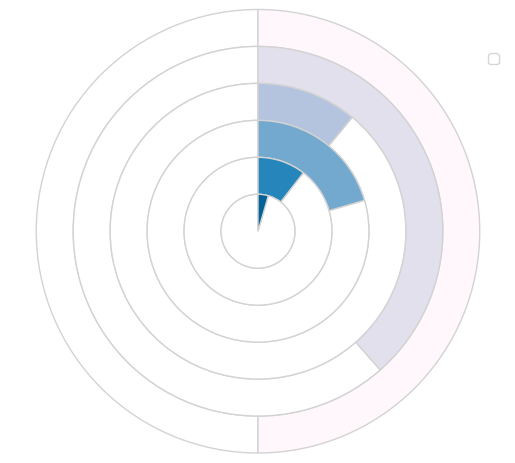

In [58]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

gut_list = ("Micro1", "Micro2", "Micro3", "Micro4", "Micro5", "Micro6") 
percent = [100, 77, 22, 41, 21, 9]
#number of data points
n = len(percent)
#find max value for full ring
k = 10 ** int(log10(max(percent)))
m = k * (1 + max(percent) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.PuBu(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    innerring, _ = ax.pie([m - percent[i], percent[i]], radius = r - i * w, startangle = 90, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "lightgrey")


plt.legend()
plt.show()



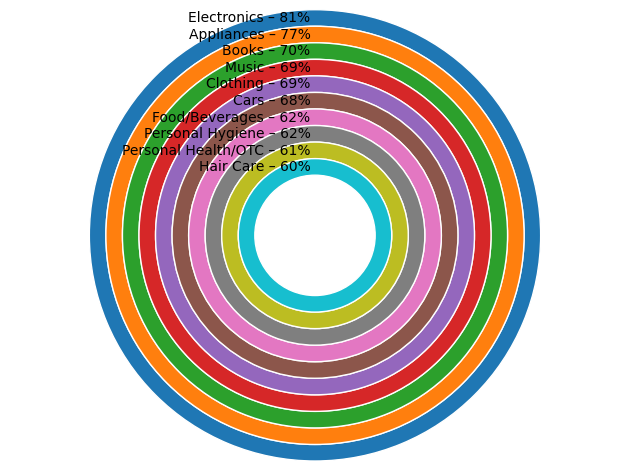

In [56]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10


cathegories = ["Electronics", "Appliances", "Books", "Music", "Clothing", "Cars", "Food/Beverages", "Personal Hygiene",
               "Personal Health/OTC", "Hair Care"]
percent = [81, 77, 70, 69, 69, 68, 62, 62, 61, 60]

# number of data points
n = len(percent)
# percent of circle to draw for the largest circle
percent_circle = max(percent) / 100

r = 1.5  # outer radius of the chart
r_inner = 0.4  # inner radius of the chart
# calculate width of each ring
w = (r - r_inner) / n

# create colors along a chosen colormap
#colors = [plt.cm.plasma(i / n) for i in range(n)]
colors = plt.cm.tab10.colors

# create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    radius = r - i * w
    ax.pie([percent[i] / max(percent) * percent_circle], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{cathegories[i]} – {percent[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{cathegories[i]} – {percent[i]}% ', ha='right', va='center')

# plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1), prop={'size': 12})
plt.tight_layout()
plt.show()

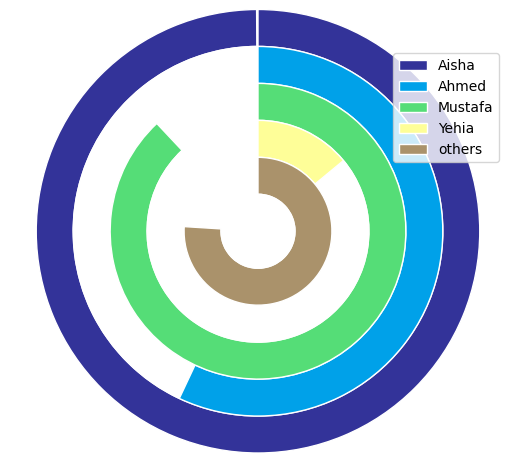

In [75]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

variable = ['Aisha', 'Ahmed', 'Mustafa', 'Yehia','others',""]
labels = variable
data = [99.9, 57, 88, 14, 76,0]
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
name = 'radar'
image_file_name='Voice_Recognition/static/assets/'+str(name)+'.jpg'
plt.savefig(image_file_name)
plt.show()

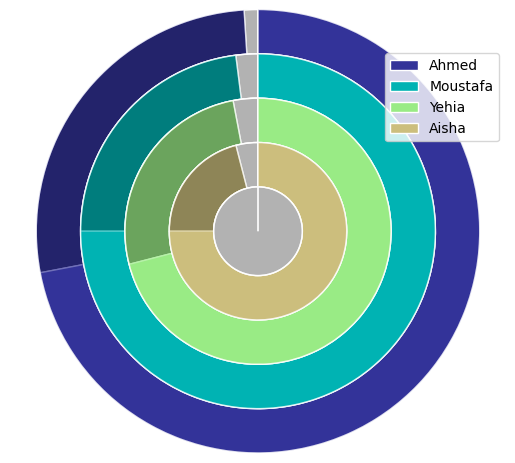

In [87]:
def plot(scores):
    labels = ["Ahmed","Moustafa","Yehia","Aisha",""]

    thresholds = [72, 75, 71, 75, 0]

    for i in range (0,4) :
        scores[i] += 100

    #number of data points
    n = len(thresholds)

    #radius of donut chart
    r = 1.5
    #calculate width of each ring
    w = r / n 

    #create colors along a chosen colormap
    colors = [cm.terrain(i / n) for i in range(n)]

    #create figure, axis
    fig, ax = plt.subplots()
    ax.axis("equal")

    #create rings of donut chart
    for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
        innerring, _ = ax.pie([100 - thresholds[i], thresholds[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["black", colors[i]])
        plt.setp(innerring, width = w, edgecolor = "white")

        innerring, _ = ax.pie([100 - scores[i], scores[i]], radius = r - i * w, startangle = 90, labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
        plt.setp(innerring, width = w, edgecolor = "white", alpha=0.7)

    plt.legend()
    name = 'radar'
    image_file_name='Voice_Recognition/static/assets/'+str(name)+'.jpg'
    plt.savefig(image_file_name)
    plt.legend()
    name = 'radar'
    image_file_name='Voice_Recognition/static/assets/'+str(name)+'.jpg'
    plt.savefig(image_file_name)
    plt.show()

scores=[-1,-2,-3,-4,0]
plot(scores)

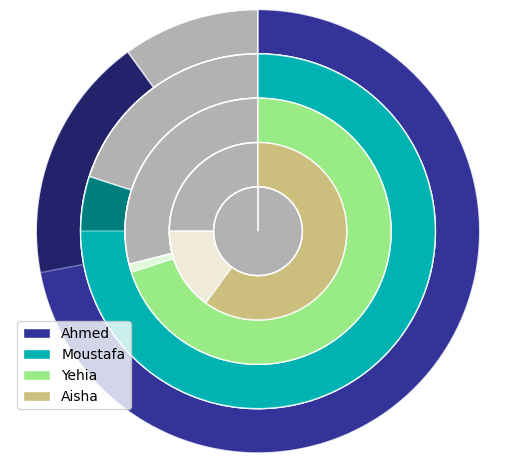

In [89]:
def plot(scores):
    labels = ["Ahmed","Moustafa","Yehia","Aisha",""]

    thresholds = [72, 75, 71, 75, 0]

    for i in range (0,4) :
        scores[i] += 100

    #number of data points
    n = len(thresholds)

    #radius of donut chart
    r = 1.5
    #calculate width of each ring
    w = r / n 

    #create colors along a chosen colormap
    colors = [cm.terrain(i / n) for i in range(n)]

    #create figure, axis
    fig, ax = plt.subplots()
    ax.axis("equal")

    #create rings of donut chart
    for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
        innerring, _ = ax.pie([100 - thresholds[i], thresholds[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["black", colors[i]])
        plt.setp(innerring, width = w, edgecolor = "white")

        innerring, _ = ax.pie([100 - scores[i], scores[i]], radius = r - i * w, startangle = 90, labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
        plt.setp(innerring, width = w, edgecolor = "white", alpha=0.7)

    plt.legend()
    name = 'radar'
    image_file_name='Voice_Recognition/static/assets/'+str(name)+'.jpg'
    plt.savefig(image_file_name)
    plt.legend()
    name = 'radar'
    image_file_name='Voice_Recognition/static/assets/'+str(name)+'.jpg'
    plt.savefig(image_file_name)
    plt.show()

scores=[-10,-20,-30,-40,0]
plot(scores)